In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

In [36]:
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
Datos.head(20)

,edad,sexo,anginapech,presionartereposo,colesterolsangre,nivelazucsangreayuna,resultaelectroreposo,frecuecardiamaxalcanza,anginainduciejercic,depresegmenSTinduciejerci,pendientesegmeSTejer,numvasosprinci,resultaanalitalasemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
Datos.describe()

,edad,sexo,anginapech,presionartereposo,colesterolsangre,nivelazucsangreayuna,resultaelectroreposo,frecuecardiamaxalcanza,anginainduciejercic,depresegmenSTinduciejerci,pendientesegmeSTejer,numvasosprinci,resultaanalitalasemia,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
print ("Cantidad de registros con cero en presion arterial reposo: ",Datos['presionartereposo'].isin([0]).sum())
print ("Cantidad de resgistro con cero en colesterol en sangre: ",Datos['colesterolsangre'].isin([0]).sum())
print ("Cantidad de registros con cero en frecuencia max alcanzada: ",Datos['frecuecardiamaxalcanza'].isin([0]).sum())

Cantidad de registros con cero en presion arterial reposo:  0
Cantidad de resgistro con cero en colesterol en sangre:  0
Cantidad de registros con cero en frecuencia max alcanzada:  0


In [ ]:
#se realiza validacion para encontrar valores en 0 solo con estas variables, ya que las demás corresponden a valores nominales

Text(0.5, 1.0, 'Identificación de Valores Atípicos')

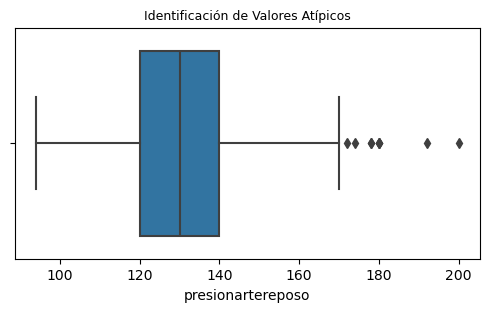

In [6]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['presionartereposo'])
plt.title('Identificación de Valores Atípicos', fontsize=9 )

Text(0.5, 1.0, 'Identificación de Valores Atípicos')

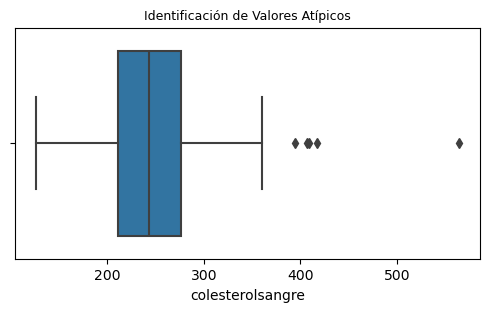

In [7]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['colesterolsangre'])
plt.title('Identificación de Valores Atípicos', fontsize=9 )

Text(0.5, 1.0, 'Identificación de Valores Atípicos')

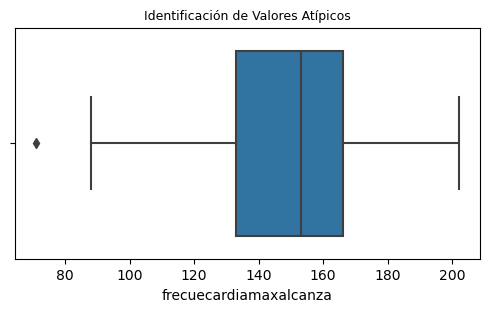

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['frecuecardiamaxalcanza'])
plt.title('Identificación de Valores Atípicos', fontsize=9 )

In [ ]:
#eliminación de valores atípicos 

In [9]:
nivel_minimo=40
nivel_maximo=175
Total_Atipicos=((Datos['presionartereposo']<nivel_minimo)|(Datos['presionartereposo']>nivel_maximo)).sum()
print ("El total de datos atípicos es {}". format(Total_Atipicos))

El total de datos atípicos es 7


In [10]:
Datos=Datos[(Datos['presionartereposo']<nivel_maximo)&(Datos['presionartereposo']>nivel_minimo)]

In [11]:
Total_Atipicos=((Datos['presionartereposo']<nivel_minimo)|(Datos['presionartereposo']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [12]:
nivel_minimo=40
nivel_maximo=370
Total_Atipicos=((Datos['colesterolsangre']<nivel_minimo)|(Datos['colesterolsangre']>nivel_maximo)).sum()
print ("El total de datos atípicos es {}". format(Total_Atipicos))

El total de datos atípicos es 5


In [13]:
Datos=Datos[(Datos['colesterolsangre']<nivel_maximo)&(Datos['colesterolsangre']>nivel_minimo)]

In [14]:
Total_Atipicos=((Datos['colesterolsangre']<nivel_minimo)|(Datos['colesterolsangre']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [15]:
nivel_minimo=80
nivel_maximo=300
Total_Atipicos=((Datos['frecuecardiamaxalcanza']<nivel_minimo)|(Datos['frecuecardiamaxalcanza']>nivel_maximo)).sum()
print ("El total de datos atípicos es {}". format(Total_Atipicos))

El total de datos atípicos es 1


In [16]:
Datos=Datos[(Datos['frecuecardiamaxalcanza']<nivel_maximo)&(Datos['frecuecardiamaxalcanza']>nivel_minimo)]

In [17]:
Total_Atipicos=((Datos['frecuecardiamaxalcanza']<nivel_minimo)|(Datos['frecuecardiamaxalcanza']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [18]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       284 non-null    int64  
 1   sexo                       284 non-null    int64  
 2   anginapech                 284 non-null    int64  
 3   presionartereposo          284 non-null    int64  
 4   colesterolsangre           284 non-null    int64  
 5   nivelazucsangreayuna       284 non-null    int64  
 6   resultaelectroreposo       284 non-null    int64  
 7   frecuecardiamaxalcanza     284 non-null    int64  
 8   anginainduciejercic        284 non-null    int64  
 9   depresegmenSTinduciejerci  284 non-null    float64
 10  pendientesegmeSTejer       284 non-null    int64  
 11  numvasosprinci             284 non-null    int64  
 12  resultaanalitalasemia      284 non-null    int64  
 13  condition                  284 non-null    int64  
dtyp

In [ ]:
#Característica de interés
#condition: hace referencia a que el paciente o persona padece o no enfermedad cardíaca (0=no padece enferm.cardíaca) (1=padece enferm.cardiaca)

In [19]:
Datos['condition'].value_counts()


condition
0    155
1    129
Name: count, dtype: int64

In [ ]:
#Análisis del datased después de haber realizado la limpieza e imputación 

In [20]:
Datos.groupby(['sexo']).count()['condition']

sexo
0     87
1    197
Name: condition, dtype: int64

(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 197.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

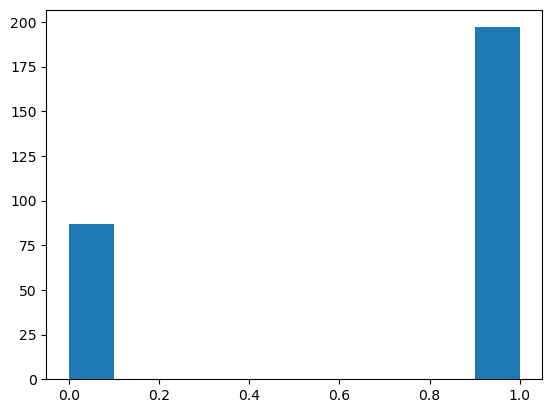

In [21]:
plt.hist(Datos.sexo)

**Análisis del histograma** 


En el gráfico anterior se puede verificar los valores para la variable sexo de tipo nominal, en donde 0 representa el sexo femenino con un total de
87 datos y 1 representa al sexo masculino, con un total de 197 datos, lo que implica que más del 50% de las personas son de sexo masculino

sexo femenino=87 (30.633% del total del dataset) 
sexo masculino=197  (69.366% del total del dataset) 

In [22]:
Mujer = Datos[Datos['sexo'] == 0]
Hombre = Datos[Datos['sexo'] == 1]


In [23]:
count_Mujer = Mujer.groupby('condition').size()
count_Hombre = Hombre.groupby('condition').size()

In [24]:
print("Para sexo Mujer:")
print(count_Mujer)

print("\nPara sexo hombre:")
print(count_Hombre)

Para sexo Mujer:
condition
0    67
1    20
dtype: int64

Para sexo hombre:
condition
0     88
1    109
dtype: int64


In [27]:
df = pd.DataFrame({'Mujer': count_Mujer, 'Hombre': count_Hombre})

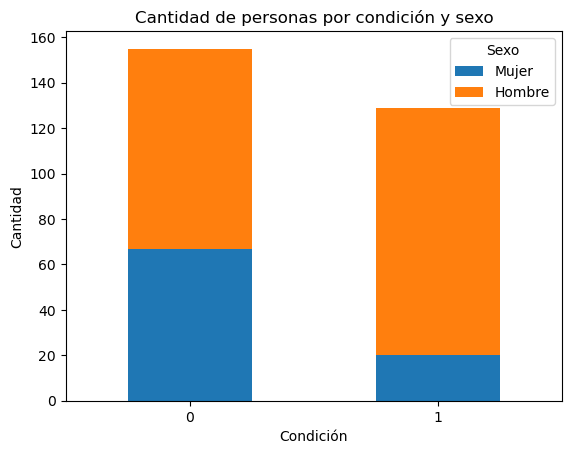

In [34]:
df.plot(kind='bar', stacked=True)
plt.xlabel('Condición')
plt.ylabel('Cantidad')
plt.title('Cantidad de personas por condición y sexo')
plt.xticks(rotation=0)  
plt.legend(title='Sexo')
plt.show()

**Análisis de la gráfica**

De acuerdo a los datos obtenidos se tiene que:

mujeres 
67 no padecen enfermedad cardiaca 
20 si padecen enfermedad cardiaca 

hombres 
88  no padecen enfermedad cardiaca
109 si padecen enfermedad cardiaca 

En la gráfica se puede ver la cantidad total para cada variable, realizando la suma 
se puede deducir entonces que la relación por sexo en cuanto a presencia de enfermedad cardiaca es de 7.04% para las mujeres contra el 38.38% para los hombres, si bien uno de los aspectos que puede influir en el resultado es la cantidad de datos registrados en el dataset, ya que en su mayoria pertenecen al género masculino, así como se ve una relación significativa en cuanto a edad, nivel de colesterol en sangre, entre otros.

En total 155 personas no padecen enfermedad cardica y 129 si padecen enfermedad cardiaca.

In [37]:
X = Datos.drop('condition',axis=1)
Y = Datos['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [38]:
print (X_train)

     edad  sexo  anginapech  presionartereposo  colesterolsangre  \
234    56     0           3                200               288   
82     66     0           2                146               278   
36     56     1           1                120               240   
237    56     1           3                132               184   
133    47     1           2                108               243   
..    ...   ...         ...                ...               ...   
291    40     1           3                110               167   
195    61     0           3                130               330   
170    65     0           3                150               225   
135    46     0           2                142               177   
293    39     1           3                118               219   

     nivelazucsangreayuna  resultaelectroreposo  frecuecardiamaxalcanza  \
234                     1                     2                     133   
82                      0        

In [39]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [40]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [41]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [42]:
print (Prediccion)


[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [43]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



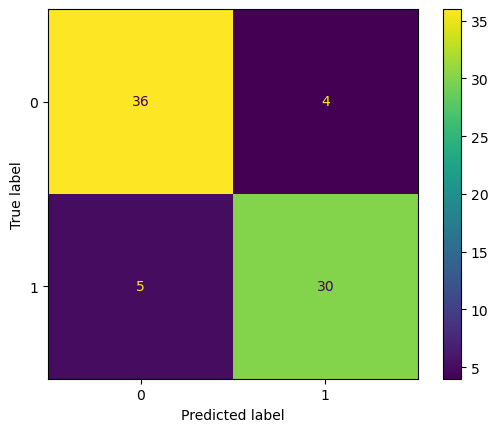

In [44]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

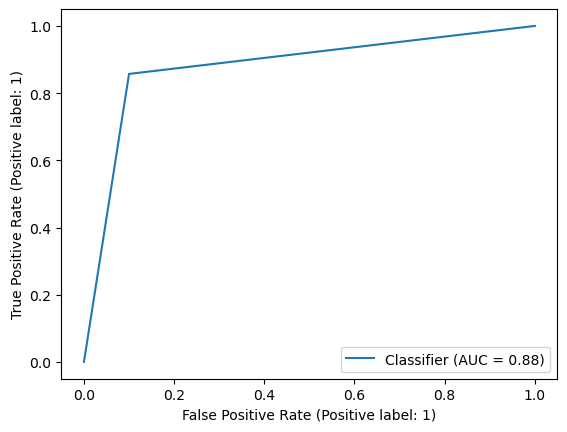

In [45]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [ ]:
 precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75





**Rendimiento del modelo en términos de precisión**



**Precisión:**

Para la clase 0, la precisión es del 88%. Esto significa que del total de instancias clasificadas como clase 0 por el modelo, el 88% realmente pertenecen a la clase 0.

Para la clase 1, la precisión también es del 88%. Esto significa que del total de instancias clasificadas como clase 1 por el modelo, el 88% realmente pertenecen a la clase 1



**Recall (Recuperación o Sensibilidad)**

Para la clase 0, el recall es del 90%. Esto significa que el 90% de todas las instancias que realmente son de la clase 0 fueron correctamente clasificadas como clase 0 por el modelo. 
Para la clase 1, el recall es del 86%. Esto significa que el 86% de todas las instancias que realmente son de la clase 1 fueron correctamente clasificadas como clase 1 por el modelo



**F1-score:** El F1-score es una métrica que combina precision y recall en una sola medida. Es útil cuando hay un desequilibrio entre las clases. Para este caso para la clase 0, el F1-score es del 89%, y para la clase 1, es del 87%



**Support (Soporte):** 

El soporte se refiere al número de ocurrencias reales de cada clase en el conjunto de datos de prueba.
Hay 40 casos de la clase 0 y 35 casos de la clase 1 en el conjunto de datos 



**De la Matriz de Confusión se puede interpretar:**

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctame  como falso 36

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 30

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 4

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamo como falso 5



**De la curva de precisión del  modelo podemos interpretar:**

El AUC es 0,88 lo que significa que el 88 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.